# Gautham Gopan  [RA1911026020091] 

# Humidiy prediction

In [1]:
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset1 = pd.read_csv("D:\weatherHistory.csv")

In [4]:
print(dataset1)

                      Formatted Date        Summary Precip Type  \
0      2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain   
1      2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain   
2      2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain   
3      2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain   
4      2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain   
...                              ...            ...         ...   
96448  2016-09-09 19:00:00.000 +0200  Partly Cloudy        rain   
96449  2016-09-09 20:00:00.000 +0200  Partly Cloudy        rain   
96450  2016-09-09 21:00:00.000 +0200  Partly Cloudy        rain   
96451  2016-09-09 22:00:00.000 +0200  Partly Cloudy        rain   
96452  2016-09-09 23:00:00.000 +0200  Partly Cloudy        rain   

       Temperature (C)  Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0             9.472222                  7.388889      0.89            14.1197   
1             9.355556           

In [5]:
dataset1 = dataset1.drop(columns=["Formatted Date","Summary","Precip Type","Temperature (C)","Wind Speed (km/h)"])

In [6]:
print(dataset1)

       Apparent Temperature (C)  Humidity  Wind Bearing (degrees)  \
0                      7.388889      0.89                   251.0   
1                      7.227778      0.86                   259.0   
2                      9.377778      0.89                   204.0   
3                      5.944444      0.83                   269.0   
4                      6.977778      0.83                   259.0   
...                         ...       ...                     ...   
96448                 26.016667      0.43                    31.0   
96449                 24.583333      0.48                    20.0   
96450                 22.038889      0.56                    30.0   
96451                 21.522222      0.60                    20.0   
96452                 20.438889      0.61                    39.0   

       Visibility (km)  Loud Cover  Pressure (millibars)  \
0              15.8263         0.0               1015.13   
1              15.8263         0.0               10

In [7]:
dataset1 = dataset1.drop(columns=["Wind Bearing (degrees)","Visibility (km)","Loud Cover","Pressure (millibars)","Daily Summary"])

In [8]:
print(dataset1)

       Apparent Temperature (C)  Humidity
0                      7.388889      0.89
1                      7.227778      0.86
2                      9.377778      0.89
3                      5.944444      0.83
4                      6.977778      0.83
...                         ...       ...
96448                 26.016667      0.43
96449                 24.583333      0.48
96450                 22.038889      0.56
96451                 21.522222      0.60
96452                 20.438889      0.61

[96453 rows x 2 columns]


In [9]:
dataset1 = dataset1.dropna()

In [10]:
x = dataset1.iloc[:,0]
x = dataset1.iloc[:,0].values.reshape(-1,1)
x.shape
y = dataset1.iloc[:,-1].values.reshape(-1,1)
y.shape

(96453, 1)

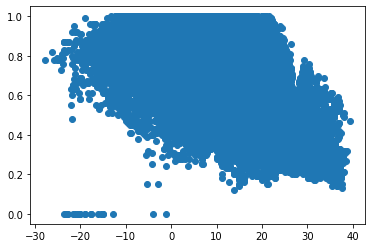

In [11]:
plt.scatter(x,y)
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

In [14]:
check = pd.DataFrame(x_test, columns = [' Apparent Temperature (C)'])
check['Humidity_Actual'] = y_test
check['Humidity_Predicted'] = y_pred
check

,Apparent Temperature (C),Humidity_Actual,Humidity_Predicted
0,14.422222,0.93,0.695157
1,12.155556,0.72,0.720148
2,23.961111,0.61,0.589986
3,15.000000,0.87,0.688787
4,12.800000,0.77,0.713042
...,...,...,...
19286,28.255556,0.37,0.542638
19287,17.216667,0.93,0.664347
19288,-1.000000,0.92,0.865193
19289,7.327778,0.93,0.773376


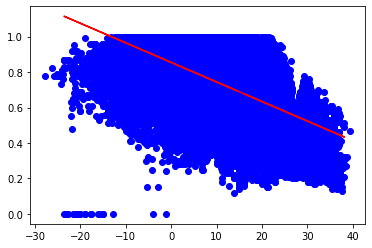

In [15]:
plt.scatter(x,y, color = 'blue')
plt.plot(x_test,y_pred,color = 'red')